In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

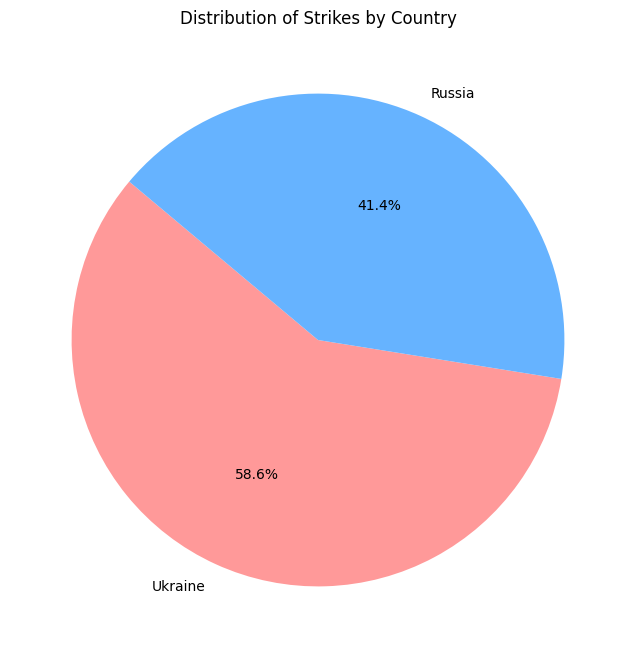

KeyError: 'Date'

In [ ]:
file_path ='datasets/ready_to_analytics.csv'
df = pd.read_csv(file_path)

# Group by country and count occurrences
country_distribution = df["country"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    country_distribution, 
    labels=country_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
)

# Title
plt.title("Distribution of Strikes by Country")
plt.show()


df['timestamp'] = pd.to_datetime(df['timestamp'])

# Count total strikes per year
yearly_distribution = df['timestamp'].dt.year.value_counts().sort_index()

# Define colors
colors = ["#66b3ff", "#ff9999"]  # 2023 (blue), 2024 (red)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    yearly_distribution, 
    labels=yearly_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)

# Title
plt.title("Total Strikes: 2023 vs. 2024")
plt.show()

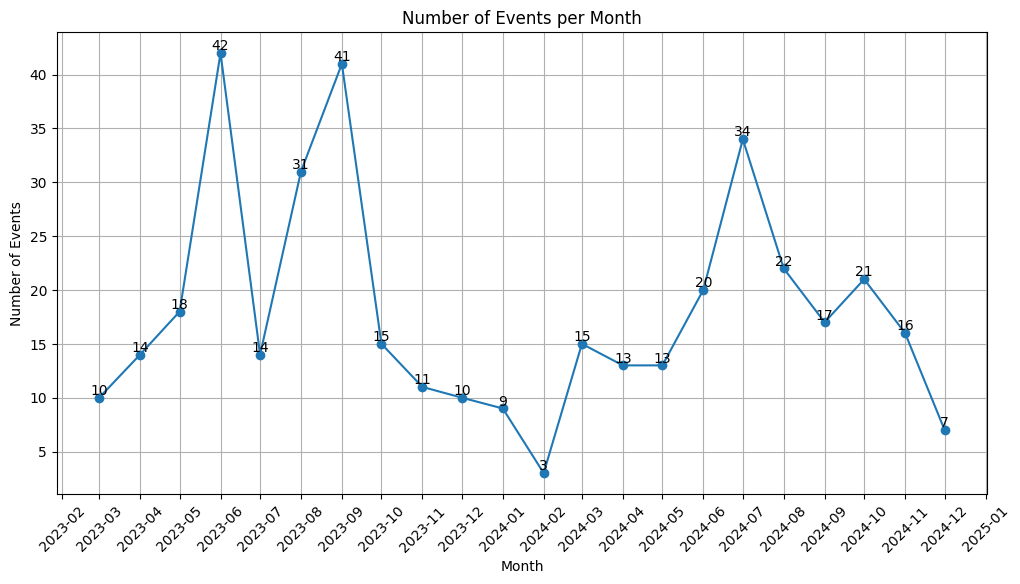

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("datasets/ready_to_analytics.csv", parse_dates=["timestamp"])

# Extract year-month for proper ordering
df["year_month"] = df["timestamp"].dt.to_period("M")

monthly_counts = df.groupby("year_month").size()

# Convert PeriodIndex to datetime for plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", linestyle="-")

# Format x-axis for 1-month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # One-month intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM

for x, y in zip(monthly_counts.index, monthly_counts.values):
    plt.text(x, y, str(y), fontsize=10, ha="center", va="bottom")  # Labels above points

plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.title("Number of Events per Month")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()